In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire

#requests will allow us to interact with the web via python
import requests
import os

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style()

## Data Preparation Exercises
The end result of this exercise should be a file named prepare.py.

Using your store items data:

### 1. Convert date column to datetime format.


In [2]:
#get my store data
combined = acquire.acquire_all()
combined.head()

,item,sale_amount,sale_date,sale_id,store,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [3]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   level_0        913000 non-null  int64  
 6   index          730400 non-null  float64
 7   item_brand     913000 non-null  object 
 8   item_id        913000 non-null  int64  
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
 13  store_address  913000 non-null  object 
 14  store_city     913000 non-null  object 
 15  store_id       913000 non-null  int64  
 16  store_state    913000 non-null  object 
 17  store_zipcode  913000 non-nul

In [4]:
# Looks like the trailing 00:00:00 GMT is in all the dates. We'll be sure to leave that out when converting the date.
combined.sale_date.head(20)

0     Tue, 01 Jan 2013 00:00:00 GMT
1     Wed, 02 Jan 2013 00:00:00 GMT
2     Thu, 03 Jan 2013 00:00:00 GMT
3     Fri, 04 Jan 2013 00:00:00 GMT
4     Sat, 05 Jan 2013 00:00:00 GMT
5     Sun, 06 Jan 2013 00:00:00 GMT
6     Mon, 07 Jan 2013 00:00:00 GMT
7     Tue, 08 Jan 2013 00:00:00 GMT
8     Wed, 09 Jan 2013 00:00:00 GMT
9     Thu, 10 Jan 2013 00:00:00 GMT
10    Fri, 11 Jan 2013 00:00:00 GMT
11    Sat, 12 Jan 2013 00:00:00 GMT
12    Sun, 13 Jan 2013 00:00:00 GMT
13    Mon, 14 Jan 2013 00:00:00 GMT
14    Tue, 15 Jan 2013 00:00:00 GMT
15    Wed, 16 Jan 2013 00:00:00 GMT
16    Thu, 17 Jan 2013 00:00:00 GMT
17    Fri, 18 Jan 2013 00:00:00 GMT
18    Sat, 19 Jan 2013 00:00:00 GMT
19    Sun, 20 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [5]:
combined.sale_date.apply(lambda date: date[ : -13]).head(2)

0    Tue, 01 Jan 2013
1    Wed, 02 Jan 2013
Name: sale_date, dtype: object

In [6]:
combined.sale_date = combined.sale_date.apply(lambda date: date[ : -13])
combined.sale_date.head(2)

0    Tue, 01 Jan 2013
1    Wed, 02 Jan 2013
Name: sale_date, dtype: object

In [7]:
combined.sale_date = pd.to_datetime(combined.sale_date, format='%a, %d %b %Y')

In [8]:
combined.sale_date.head()

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: sale_date, dtype: datetime64[ns]

### 2. Plot the distribution of sale_amount and item_price.

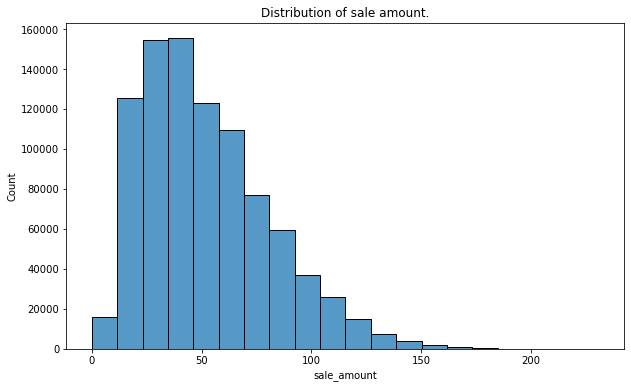

In [9]:
sns.histplot(combined.sale_amount, bins = 20)
plt.title('Distribution of sale amount.');

In [10]:
# This looks like an almost normal distribution

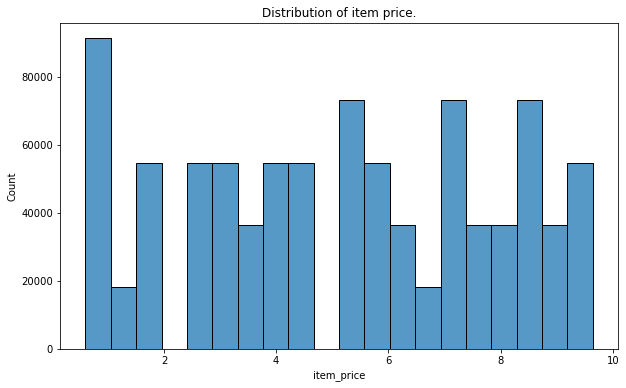

In [11]:
sns.histplot(combined.item_price, bins = 20)
plt.title('Distribution of item price.');

In [12]:
# This looks roughly distributed

### 3. Set the index to be the datetime variable.

In [13]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item           913000 non-null  int64         
 1   sale_amount    913000 non-null  float64       
 2   sale_date      913000 non-null  datetime64[ns]
 3   sale_id        913000 non-null  int64         
 4   store          913000 non-null  int64         
 5   level_0        913000 non-null  int64         
 6   index          730400 non-null  float64       
 7   item_brand     913000 non-null  object        
 8   item_id        913000 non-null  int64         
 9   item_name      913000 non-null  object        
 10  item_price     913000 non-null  float64       
 11  item_upc12     913000 non-null  int64         
 12  item_upc14     913000 non-null  int64         
 13  store_address  913000 non-null  object        
 14  store_city     913000 non-null  object        
 15  

In [14]:
combined = combined.set_index('sale_date').sort_index()
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   level_0        913000 non-null  int64  
 5   index          730400 non-null  float64
 6   item_brand     913000 non-null  object 
 7   item_id        913000 non-null  int64  
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  item_upc12     913000 non-null  int64  
 11  item_upc14     913000 non-null  int64  
 12  store_address  913000 non-null  object 
 13  store_city     913000 non-null  object 
 14  store_id       913000 non-null  int64  
 15  store_state    913000 non-null  object 
 16  store_zipcode  913000 non-null  int64  
dtypes: float64(3)

### 4. Add a 'month' and 'day of week' column to your dataframe.

In [15]:
combined['month'] = combined.index.strftime('%m-%b')

In [16]:
combined['weekday'] = combined.index.strftime('%w-%a')

In [17]:
combined.head()

,item,sale_amount,sale_id,store,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,01-Jan,2-Tue
2013-01-01,17,26.0,295813,3,16,16.0,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue
2013-01-01,7,32.0,125995,10,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,01-Jan,2-Tue
2013-01-01,18,45.0,314073,3,17,17.0,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue
2013-01-01,19,34.0,332333,3,18,18.0,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [18]:
combined['sales_total'] = combined.sale_amount * combined.item_price
combined.sales_total.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

In [19]:
#to see sale total
combined.head()

,item,sale_amount,sale_id,store,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,01-Jan,2-Tue,10.92
2013-01-01,17,26.0,295813,3,16,16.0,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue,30.16
2013-01-01,7,32.0,125995,10,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,01-Jan,2-Tue,308.48
2013-01-01,18,45.0,314073,3,17,17.0,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue,197.55
2013-01-01,19,34.0,332333,3,18,18.0,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue,25.16


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

### 1. Convert date column to datetime format.

In [20]:
#read csv
data = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [21]:
#acquire data
data = acquire.acquire_power_data()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [23]:
data.columns = [col.replace('+', '_').lower() for col in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4383 non-null   object 
 1   consumption  4383 non-null   float64
 2   wind         2920 non-null   float64
 3   solar        2188 non-null   float64
 4   wind_solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [24]:
data.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [25]:
data.date = pd.to_datetime(data.date)

In [26]:
data.date = pd.to_datetime(data.date)
data.date.head(2)

0   2006-01-01
1   2006-01-02
Name: date, dtype: datetime64[ns]

### 2. Plot the distribution of each of your variables.

/var/folders/yy/vlb31b750w74n1jkdd8391tw0000gn/T/ipykernel_24790/984863245.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


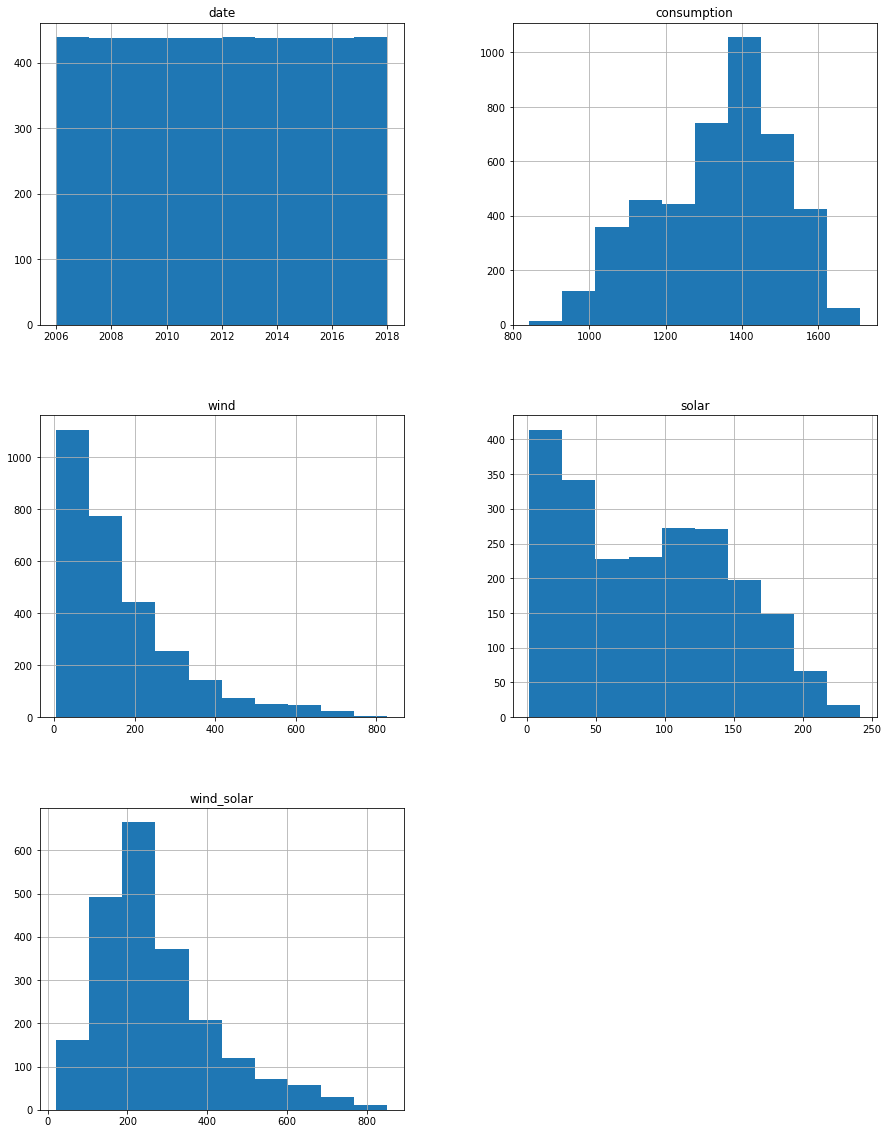

In [27]:

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

### 3. Set the index to be the datetime variable.

In [28]:
data = data.set_index('date').sort_index()
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         2920 non-null   float64
 2   solar        2188 non-null   float64
 3   wind_solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [29]:
data.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 4. Add a month and a year column to your dataframe.

In [30]:
data['month'] = data.index.strftime('%m-%b')

In [31]:
data['year'] = data.index.year


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         2920 non-null   float64
 2   solar        2188 non-null   float64
 3   wind_solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [33]:
data.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01-Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01-Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01-Jan,2006
2006-01-04,1457.217,NaN,NaN,NaN,01-Jan,2006
2006-01-05,1477.131,NaN,NaN,NaN,01-Jan,2006


### 5. Fill any missing values.